In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import dataset
training_set = pd.read_csv('mitbih_train.csv')
training_set.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


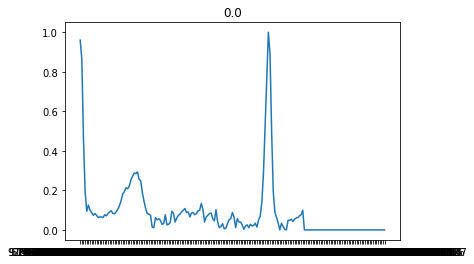

In [4]:
plt.plot(training_set.iloc[0, :-1])
plt.title(training_set.iloc[0, -1])
plt.show()

In [5]:
training_set.iloc[:, -1].value_counts()

0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 0.000000000000000000e+00.88, dtype: int64

In [55]:
X = np.expand_dims(np.array(training_set.iloc[:, :-1]), 2)
Y = training_set.iloc[:, -1]
from keras.utils import to_categorical
Y = to_categorical(Y)
pd.DataFrame(Y)

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
87548,0.0,0.0,0.0,0.0,1.0
87549,0.0,0.0,0.0,0.0,1.0
87550,0.0,0.0,0.0,0.0,1.0
87551,0.0,0.0,0.0,0.0,1.0


In [56]:
X.shape

(87553, 187, 1)

In [57]:
from keras.models import Sequential
from keras.layers import *

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, strides=1, input_shape=(size, 1)))

model.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu', padding='same'))
model.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=5, strides=2))

for i in range(3):
    model.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu', padding='same'))
    model.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_139 (Conv1D)          (None, 183, 32)           192       
_________________________________________________________________
conv1d_140 (Conv1D)          (None, 183, 32)           5152      
_________________________________________________________________
conv1d_141 (Conv1D)          (None, 183, 32)           5152      
_________________________________________________________________
max_pooling1d_61 (MaxPooling (None, 90, 32)            0         
_________________________________________________________________
conv1d_142 (Conv1D)          (None, 90, 32)            5152      
_________________________________________________________________
conv1d_143 (Conv1D)          (None, 90, 32)            5152      
_________________________________________________________________
max_pooling1d_62 (MaxPooling (None, 43, 32)            0         
__________

In [58]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, epochs=75, batch_size=500)

W1127 11:48:50.937706 4646544832 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1127 11:48:51.136963 4646544832 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/75
